# Assignment 6 Ex. 1 
<b>Gradient Descendent Algorithm </b>  

The goal is to find numerically the local minimum of the function $f(r_1, r_2)$, which lies near the point $ r_1= 1, r_2= 0$
$$ f(\mathbf{r})= \sqrt{r_1^2+r_2^2} +sin(r_1)+2cos(r_2+0.5)
$$

## Ex 6.1.1
At first define two functions that compute $f$ and its gradient $\nabla f$ (can be obtained through analytical differentiation)
$$ \nabla f =\left[ \frac{r_1}{\sqrt{r_1^2+r_2^2} }+cos(r_1), \frac{r_2}{\sqrt{r_1^2+r_2^2}} -2sin(r_2+0.5)\right]$$ 

In [1091]:
import numpy as np
# np.set_printoptions(precision=3) #reduces the number of printed digits
import matplotlib.pyplot as plt
from numpy.linalg import norm

In [1092]:
def f(r):
    r1, r2 = r
    return norm((r1, r2)) + np.sin(r1) + 2*np.cos(r2+0.5)

In [1093]:
def Df(r1, r2):
    return (r1 / norm((r1,r2)) + np.cos(r1), r2 / norm((r1, r2))-2 * np.sin(r2 + 0.5))

### 6.1.2
Check for the point (1,0) if the gradient produce results consistent with the derivative obtained through numerical differentiation (via finite difference)

In [1094]:
h = 1e-5
x, y = 1, 0
D = Df(x, y)
Dinx = (f((x + h, y)) - f((x - h, y)))/(2*h)
Diny = (f((x, y + h)) - f((x, y - h)))/(2*h)
for r in np.linspace(21, 0, 22, dtype=int):
    if (D[0].round(r), D[1].round(r)) == (Dinx.round(r), Diny.round(r)):
        print("checks out to", r, "digits for finite difference h of", h)
        break

checks out to 10 digits for finite difference h of 1e-05


### 6.1.3
Perfom the minimization of $f(\mathbf{r})$ using a self-implemented version of the gradient descendent algorithm explained in the theory lesson:
$$\mathbf{r}_{k+1}=\mathbf{r}_{k}-\delta \nabla f({\mathbf{r}_{k}})
$$

For simplicity it is possible to assume $\delta$ to be constant all throught the optimization. 
Try different $\delta$ to find the optimal. What happens if $\delta$ is too large or too small? (explain with a brief statment) 

You should iterate until a convergence criteria is fulfilled (eg $norm(\nabla f(\mathbf{r}_k))$<threshold).
Also is adviseable to put a maximum limit to the iterations (say 1000 or more), just in case convergence it is not achieved.

Perform the minimization twice, once starting from $\mathbf{r}_0=(1,0) $ , and the second time from $\mathbf{r}_0=(-1,-1) $. 
What happens in the two cases?

HINTS: One idea could be to create a <b> while </b> loop or a <b> for </b> loop and iterate untill the convergence is achieved or untill the number of iterations excede the limit, than break the loop with the <b>break</b> statment

In [1095]:
def minimization_f(df, r = (0,0), sig = 1e-2):
    l = []
    for i in range(10000):
        d = df(r[0], r[1])
        assert d == Df(r[0], r[1])
        rn = []
        for i in range(2):
            rn.append(r[i] - sig*d[i])
        if norm(d) <= 1e-10:
            break
        r = rn
        l.append(rn)
    return rn, l

In [1096]:
path = [0,0,0]
mymin1, path[0] = minimization_f(Df, (1, 0), sig = 0.01)
mymin2, path[1] = minimization_f(Df, (1, 0), sig = 0.1)
mymin3, path[2] = minimization_f(Df, (1, 0), sig = 1)
# mymin4, path[3] = minimization_f(Df, (1, 0), sig = 10) # this one is just not productive


For different values of sigma, the minimization process makes steps of different size.\\
These all work fine. The sigma for which f converges reasonably quickly and precisely, is the best choice. Any sigma smaller than it, is unecessarily computationally expensive. Any sigma bigger than it, as with ten and in this case any value slightly above one, will not suitably converge.

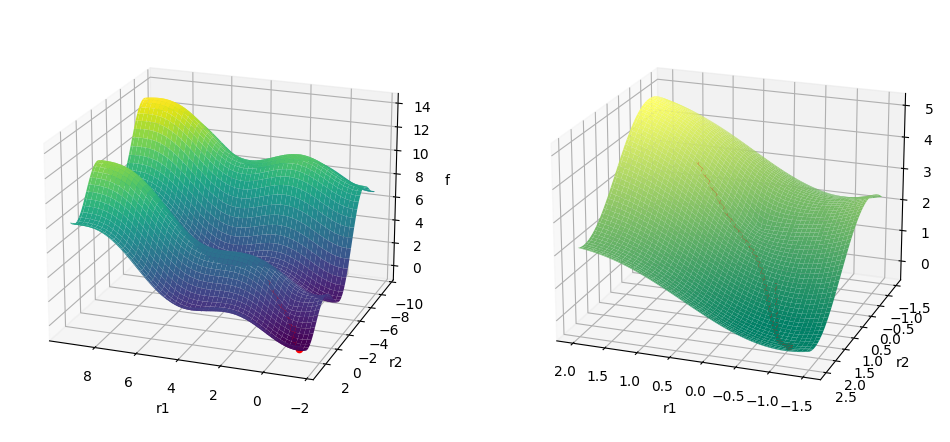

In [1097]:
#Make data1
X = np.linspace(-1.5, 3*np.pi, 100)
Y = np.linspace(-3*np.pi, np.pi, 100)
Z = np.zeros(shape=(len(X), len(Y)))
for i, j in enumerate(X):
    for k, l in enumerate(Y):
        Z[k, i] = f((j, l))
X, Y = np.meshgrid(X, Y)
Z = Z.reshape(X.shape)

#Make data2
X2 = np.linspace(-1.5, 2, 100)
Y2 = np.linspace(-1.5, 2.5, 100)
Z2 = np.zeros(shape=(len(X2), len(Y2)))
for i, j in enumerate(X2):
    for k, l in enumerate(Y2):
        Z2[k, i] = f((j, l))
X2, Y2 = np.meshgrid(X2, Y2)
Z2 = Z2.reshape(X2.shape)

#Plot the surfaces
fig, ax = plt.subplots(1,2, subplot_kw={"projection": "3d"}, figsize=(12,8))
ax[0].plot_surface(X, Y, Z, vmin = 0, cmap="viridis")
ax[1].plot_surface(X2, Y2, Z2, vmin=0, cmap="summer")

#Path of minimization
for j in path:
    x = []
    y = []
    for i in j:
        x.append(i[0])
        y.append(i[1])
    z = []
    for i in zip(x, y):
        z.append(f(i))

    #With path
    ax[0].plot3D(x, y, z, color="red", linewidth=2)
    ax[1].plot3D(x, y, z, color="red", linewidth=2)

ax[0].scatter(mymin1[0], mymin1[1], f(mymin1), color="red")
ax[1].scatter(mymin1[0], mymin1[1], f(mymin1), color="red")

#Peripheral
ax[0].set_xlabel("r1")
ax[0].set_ylabel("r2")
ax[0].set_zlabel("f")
ax[1].set_xlabel("r1")
ax[1].set_ylabel("r2")
ax[1].set_zlabel("f")

# This angle shows the path of the minimization the best it can
ax[0].view_init(20,110)
ax[1].view_init(20,110)
plt.show()

While attempting to have the path taken by the minimization displayed, it appears I've hit the boundaries of what plt can do.
Its 3D plots simply don't handle different objects in one graph well enough to be able to see lines on top of surfaces no matter what priority one tries to give with the likes of zorder.

I would've liked to make this reaaaally fancy, but oh well.

Took long enough. Moving on.

### 6.1.4
Compare your results with the ones obtained from the scipy minimization algorithm (scipy.optimize.minimize ) https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html 


In [1098]:
from scipy.optimize import minimize

min = minimize(f, (1, 0))
for i in range(2):
    assert mymin1[i].round(3) == min.x[i].round(3)
print("checks out")

checks out


# Ex. 6.2  
$\textbf{Linear regression}$ In this exercise, you are going to familiarize yourself with the gradient descent algorithm, by performing linear regression on different datasets from Moodle.

## 6.2.1
Load the dataset ex6_2.dat. It contains two columns of $x$- and $y$-values respectively. Plot the data in a scatter plot.

The observed data can be modelled through a regression line: 
$$y^{L.R.} = f(x)= wx+b$$ 
From your intuition give a reasonable guess of the slope $w_0$ and of the intercept $b_0$.
Add the initial guessed regression line to the plot.


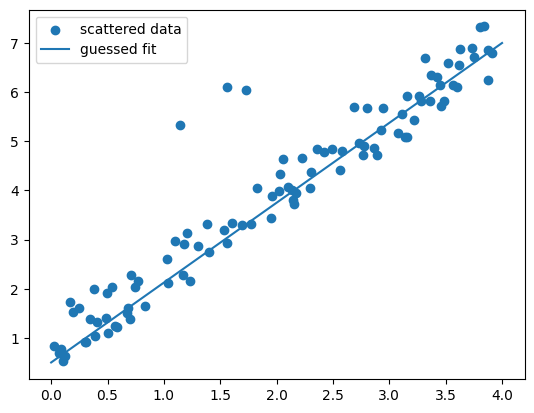

In [1099]:
with open("ex6_2.dat") as f:
    lst = f.readlines()
data = []
data.append(lst[0].split(" "))
data.append(lst[1].split(" "))
data = np.array(data, dtype=float).T

fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1])

b_guess = 1/2
w_guess = 6.5/4

x = np.linspace(0,4,40)
y = b_guess + x * w_guess
ax.plot(x, y)
ax.legend(["scattered data", "guessed fit"])

## 6.2.2
In order to find a proper set of regression line for the data, a common approach is to choose the cofficients ($w,b$), such that they minimize the p-norm of the error vector ( $y_k-f(x_k;w,b)$ ) evaluated by the loss function $ E^p(w,b)$


$$ E^p(w,b)=\left(\frac{1}{N}\sum\limits_k\left|(y_k-f(x_k;w,b)\right|^p\right)^\frac{1}{p}$$

Using the $x,y$ data read previously, implement the function $E^p(w,b)$ for a generic $p$ (defining a function E([w,b],p) ).
Than calculate the mean absolute error $E^1(w_0,b_0)$, the least square error $E^2(w_0,b_0)$, but also $E^{10}$,$E^{100}$ and $E^{200}$

In [1100]:
def E(v,p):
    w, b = v
    N = len(data[:,0])
    sum = 0
    for i in range(N):
        sum += abs(data[i,1] - (w * data[i,0] + b))**p
    E = (1/N*sum)**1/p
    return E

In [1101]:
E1 = E([w_guess, b_guess], 1)
E2 = E([w_guess, b_guess], 2)
E10 = E([w_guess, b_guess], 10)
E100 = E([w_guess, b_guess], 100)
E200 = E([w_guess, b_guess], 200)
print(E1, E2, E10, E100, E200)

0.38745194810291167 0.2015046495690773 151.84264595944964 6.203163106348596e+44 1.829506060387392e+93


## 6.2.3
An other loss function is the maximum error:
$$ E^\infty = max|y_k-f( x_k)|
$$
Create a function to compute $E^\infty$ and compare it to the previous loss functions, 

In [1102]:
def Einf(v):
    w, b = v
    lst = []
    for i in range(len(data[:, 0])):
        lst.append(abs(data[i, 1] - (w * data[i, 0] + b)))
    return max(lst)

In [1103]:
Einfval = Einf([w_guess, b_guess])
print(Einfval)

3.074789376564632


It's bigger, yo. As expected, since outliners.

### 6.2.4
Optimize the parameter w and b for the loss functions $E^1,E^2,E^3,E^{5},E^{10},E^{\infty}$ .
HINT You can use the scipy.optimize.minimize function, doing so you should join the variables to be optimized (w and b) in an array, and the fixed value of the parameter p should be specified in the args() . 
Save the optimized w and b parameters (e.g. in a dictionary)

In [1104]:
pl = [1,2,3,5,10]
dic1 = {}
dic2 = {}
for i in pl:
    min = minimize(E, [6.5/4, 1/2], args=(i)).x
    dic1["w" + str(i)] = min[0]
    dic2["b" + str(i)] = min[1]

mininf = minimize(Einf, [6.5/4, 1/2]).x
dic1["wInf"] = mininf[0]
dic2["bInf"] = mininf[1]

print(dic1)
print(dic2)

{'w1': 1.590043200382539, 'w2': 1.542840979128002, 'w3': 1.4889411222432656, 'w5': 1.4737626691444747, 'w10': 1.496593386575028, 'wInf': 1.988255257899916}
{'b1': 0.6850764436983304, 'b2': 0.8830309006883846, 'b3': 1.1930312961509615, 'b5': 1.5978598086076923, 'b10': 1.840407788628056, 'bInf': 0.7900846984216695}


## 6.2.5
Scatter again your data, drawing the regression lines obtained minimizing  $E^1,E^2,E^{10},E^{100},E^{\infty}$, add a legend to the plot
<br>

C:\Users\Xeonis7\AppData\Local\Temp\ipykernel_13004\15386346.py:6: RuntimeWarning: overflow encountered in scalar power
  sum += abs(data[i,1] - (w * data[i,0] + b))**p
c:\Users\Xeonis7\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\Xeonis7\AppData\Local\Temp\ipykernel_13004\15386346.py:6: RuntimeWarning: overflow encountered in scalar power
  sum += abs(data[i,1] - (w * data[i,0] + b))**p


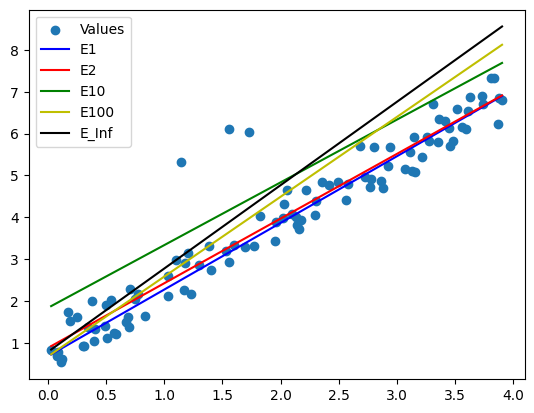

In [1105]:
pl = [1,2,10,100]
dic1 = {}
dic2 = {}
for i in pl:
    min = minimize(E, [6.5/4, 1/2], args=(i)).x
    dic1["w" + str(i)] = min[0]
    dic2["b" + str(i)] = min[1]

mininf = minimize(Einf, [6.5/4, 1/2]).x
dic1["wInf"] = mininf[0]
dic2["bInf"] = mininf[1]

cl = ["b", "r", "g", "y", "black"]
fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1])

#Readabillity died, but oh well it's funny, I'm leaving it in
[ax.plot(data[:,0], j*data[:,0] + l, c = cl[m]) for m, ((i,j), (k,l)) in enumerate(zip(dic1.items(), dic2.items()))]
ax.legend(["Values", "E1", "E2", "E10", "E100", "E_Inf"])

If there's anything with this due to the overflow, vsc warns me off, then I don't see how to fix it within given assignment, so I won't even bother to check in the first place...

# Ex 6.3

$\textbf{Polynomial regression - basis functions.}$  In this exercise you are going to fit non-linear data to an expansion over a set of basis functions $\phi_b(x)$ 
$$ f(x;\mathbf{w}) = \sum_b^{N_{BF}} w_b \phi_b(x) $$

In [1106]:
import pandas as pd

## 6.3.1
ex6_3.dat contains another dataset of $x$- and $y$-values, load the file and plot the data. <br>
The curve represents the energy (in atomic units) as a function of the distance between two atoms (in Angstrom: $1 A=10^{-10}m)$. <br>
You will find that this time, there is no linear dependece between $x$ and $y$.

Text(0, 0.5, 'Energy in amu')

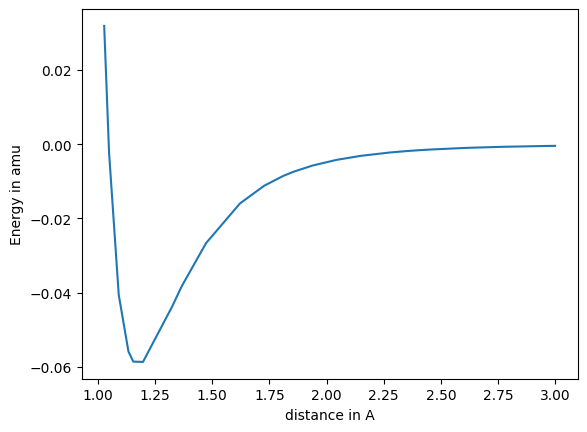

In [1107]:
df = pd.read_csv("ex6_3.dat", header=None, delimiter=" ")
arr = df.to_numpy()

fig, ax = plt.subplots()
ax.plot(arr[:,0], arr[:,1])
ax.set_xlabel("distance in A")
ax.set_ylabel("Energy in amu")

## 6.3.2
As a first attempt, use polynomials up to degree 5 as basis functions ($\phi_b=x^b ; b \in [0,5]$). <br>
First, build the Vandermonde-Matrix ($\textbf{Hint}$: You can use $\texttt{numpy.vstack}$ to create the Vandermonde-Matrix): 
\begin{equation}
    V_{kb}=x_k^{b}  \ \ \ ( b \in [0,5])
\end{equation}

It is also possible to use the $\texttt{numpy.vander}$ function.
https://numpy.org/doc/stable/reference/generated/numpy.vander.html <br>
The Vandermond matrix is useful because allow a quick extimation of the value of the fitting polynomial at the $x_k$ points for different values of $\mathbf{w}$

$$ f(x_k;\mathbf{w}) = \sum_{b=0}^{N_{BF}} x_k^b  w_b = \sum_{b=0}^{N_{BF}} V_{kb} w_b$$

For the initial guess $\mathbf{w}_0=[8, -18.5,  18.,  -9,   2.2,  -0.2]$, plot the polynomial together with the curve.

Text(0, 0.5, 'Energy in amu')

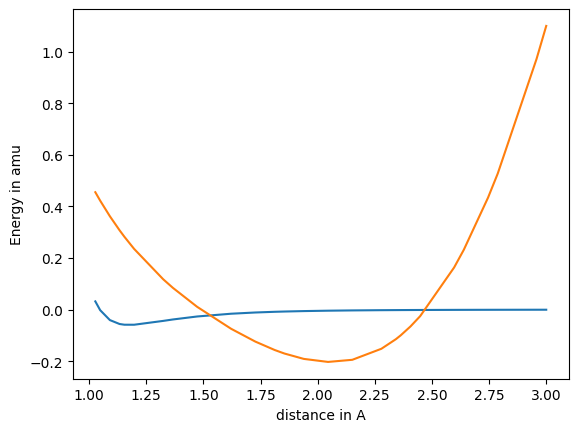

In [1108]:
w0=np.array([8, -18.5,  18.,  -9,   2.2,  -0.2])
xk = arr[:,0]

def f(xk, w0):
    V = np.vander(xk, increasing=True)
    y = []
    for j in range(len(V[:,0])):
        func = 0
        for i in range(len(w0)):
            func += w0[i] * V[j, i]
        y.append(func)
    return y

yk = f(xk, w0)

fig, ax = plt.subplots()
ax.plot(arr[:,0], arr[:,1])
ax.plot(arr[:,0], yk)
ax.set_xlabel("distance in A")
ax.set_ylabel("Energy in amu")


## 6.3.3
To find the optimal values of $\mathbf{w}$ minimize the fitting using the least squares method. <br>
Create a loss function $E^2$ for this problem.
$$ E^2(\mathbf{w})=\left(\frac{1}{N_{points}}\sum\limits_k\left|(y_k-f(x_k;\mathbf{w})\right|^2\right)^\frac{1}{2}$$

Minimize $E^2$ using scipy. Compare the results with the ones calculated from the numpy.polyfit function.
Be aware on which order are the weights outputted by numpy.polyfit https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html 

0.07090861702409078
[  6.71730685 -18.08929188  18.64754398  -9.28435731   2.24548001
  -0.2118899 ]
[  6.91871205 -18.63262666  19.21130264  -9.56667328   2.3139854
  -0.21835753]


Text(0, 0.5, 'Energy in amu')

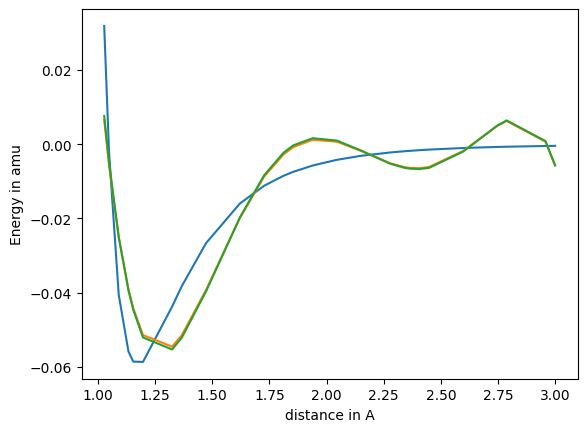

In [1109]:
def E2(w, xk, ytr):
    yk = f(xk, w)
    N = len(yk)
    sum = 0
    for i in range(N):
        sum += abs(ytr[i] - yk[i])**2
    E = (1/N*sum)**1/2
    return E

E2now = E2(w0, xk, arr[:,1])
print(E2now)

w = minimize(E2, w0, args=(xk, arr[:,1])).x
npw = np.flip(np.polyfit(arr[:,0], arr[:,1], 5))
print(w)
print(npw)

yk1 = f(xk, w)
yk2 = f(xk, npw)

fig, ax = plt.subplots()
ax.plot(arr[:,0], arr[:,1])
ax.plot(arr[:,0], yk1)
ax.plot(arr[:,0], yk2)
ax.set_xlabel("distance in A")
ax.set_ylabel("Energy in amu")

They are reasonably close.

## 6.3.4
Now if:
$$ \vec{y}= V \vec{w} + \vec{\epsilon}
$$

multiplying the left and the right hand side by the pseudo inverse matrix of $V$ (https://inst.eecs.berkeley.edu/~ee127/sp21/livebook/def_pseudo_inv.html)
$$ V_{pseudoinv}= (V^TV)^{-1}V^T $$


$$  (V^TV)^{-1}V^T \vec{y}=   (V^TV)^{-1}V^T (V \vec{w} + \vec{\epsilon}) $$
The equation is projected on the linear algebra subspace defined by the columns of $V$.
and choosing the coefficients vector $w$ equal to:
$$  \vec{w}=(V^TV)^{-1}V^T \vec{y} $$
Produce an error vector $\epsilon$ which is orthogonal to the subspace defined by the columns of V:
$$(V^TV)^{-1}V^T \vec{\epsilon} = 0 $$
$$V^T \vec{\epsilon} = 0 $$

This is indeed the least square solution to the fitting. <br>
Verify that the $w$ calculated in this way coincides with the output of the numpy.polyfit function.


[ 8.99910949e+02 -4.52895939e+03  9.72858029e+03 -1.14617759e+04
  7.81160031e+03 -2.85799779e+03  3.39809095e+02  8.30438067e+01
 -7.29785625e+00 -7.53698431e+00  4.91272232e-01 -7.57347447e-02
 -8.82230157e-02  6.58943546e-02  8.14634042e-02 -2.81422967e-02
 -1.12220704e-02  4.42199511e-03  5.18996454e-05  8.02899876e-06
 -8.78786500e-05  4.45190037e-05 -1.33700324e-05  7.28570626e-07
  4.86703213e-07 -6.82792820e-08 -6.56661427e-10]


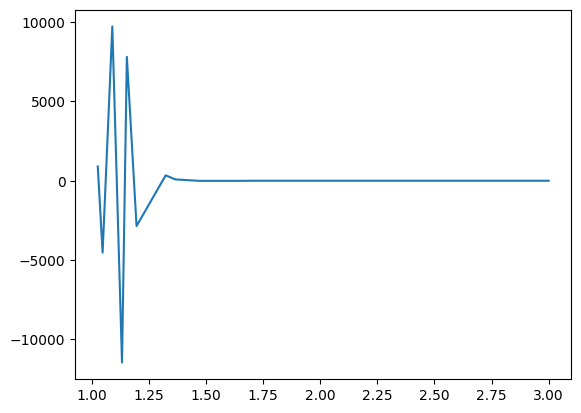

In [1110]:
V = np.vander(arr[:,0], increasing=True)
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(V.T,V)),V.T),arr[:,1])
print(w)

fig, ax = plt.subplots()
ax.plot(arr[:,0], w)

It does in fact not coincide with the values for y given by np.polyfit and I can't say I understand, why or this last exercise in general.

## 6.3.5 (BONUS) 
It seems polynomials are not ideal basis functions to fit this data. <br>
The Lennard-Jones potential $U_{LJ}(\vec{r}_{ab})$ can be used to compute pairwise interactions between atoms $a$ and $b$.
$$
U_{LJ}(\vec{r}_{ab}) = 4\epsilon \left(\left[\frac{\sigma}{r_{ab}}\right]^{12} - \left[\frac{\sigma}{r_{ab}}\right]^6 \right)
$$

Optimize $\epsilon, \sigma$ using the least squares fitting. <br>
Than plot again your results

In [1111]:
eps,sigma=0.1,1
def U_lj(r,eps=eps,sigma=sigma):
    return 4*eps*((sigma/r)**12-(sigma/r)**6)